# 시작


In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/train.csv")
test = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/test.csv')
sampleSubmission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')

In [3]:
print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## EDA와 전처리

### 1.datetime 컬럼 전처리하기


In [3]:
# datetime 데이터 타입을 변경
train['datetime'] =pd.to_datetime(train['datetime'])

# year, month, hour, 요일(dayofweek)으로 별도 컬럼 만들기

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

print(train.shape)

train.head()

(10886, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


### 1-2 시간 데이터 *분석*

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

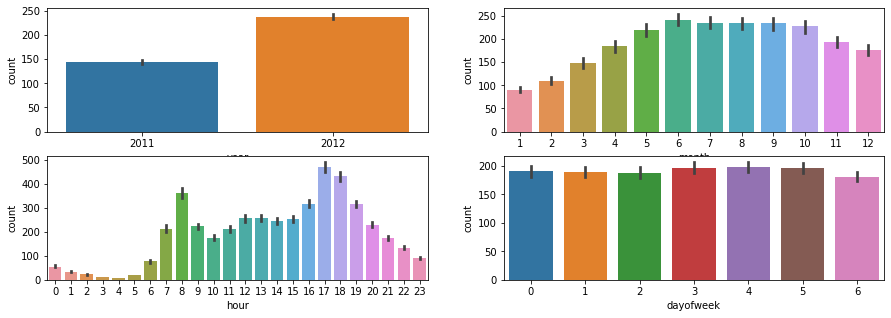

In [7]:
fig, ax = plt.subplots(2,2, figsize = (15,5))

sns.barplot(data = train, x='year', y='count', ax=ax[0,0])
sns.barplot(data = train, x='month', y='count', ax=ax[0,1])
sns.barplot(data = train, x='hour', y='count', ax=ax[1,0])
sns.barplot(data = train, x='dayofweek', y='count', ax=ax[1,1]);


위의 그림을 보면 year, month, hour가 count에 영향을 주고 있음. 
요일도 중요한 변수일 거라고 생각했는데 생각보다 큰 차이가 없음.

In [5]:
# 추가적으로 연과 월을 묶으면 어떻게 될까?
train['year(str)'] = train['year'].astype('str')
train['month(str)'] = train['month'].astype('str')
train['year-month'] = train['year(str)'] +'-'+train['month(str)']

print(train.shape)

train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek,year(str),month(str),year-month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5,2011,1,2011-1


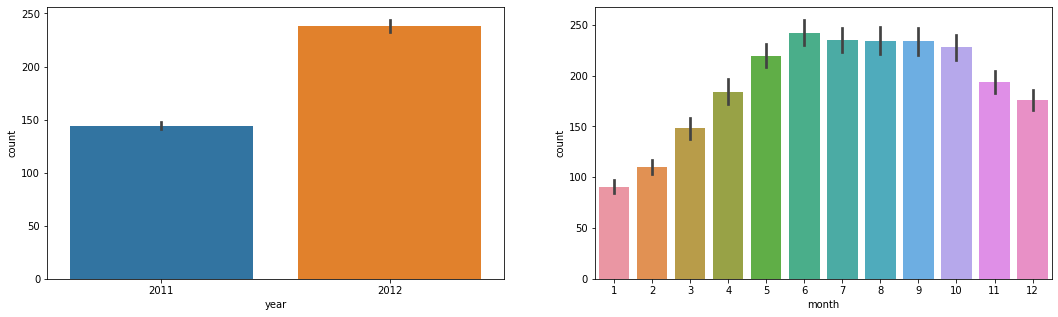

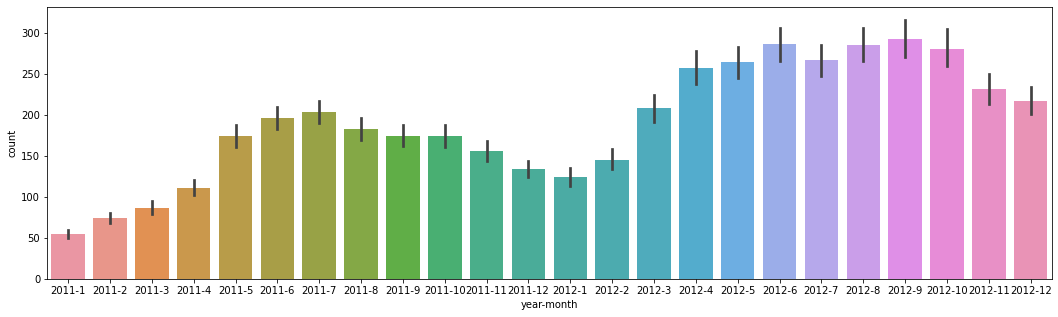

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,5)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)


fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,5)

sns.barplot(data=train, x='year-month', y='count', ax=ax3);

위의 표를 보면 month만 보면 12월에 1월에 비해 거의 카운트가 많다는 건데 아래 연도와 월이 같이 표시된 그래프를 보면 큰 차이가 없음. 이는 해가 갈 수록 성장하는 회사의 특성이 반영된 것이지 월별 특성은 좋은 특성이 아니라고 생각됨


sos 특성공학을 적용할 수 있나 확인해보자.

###1-3 hour 분석

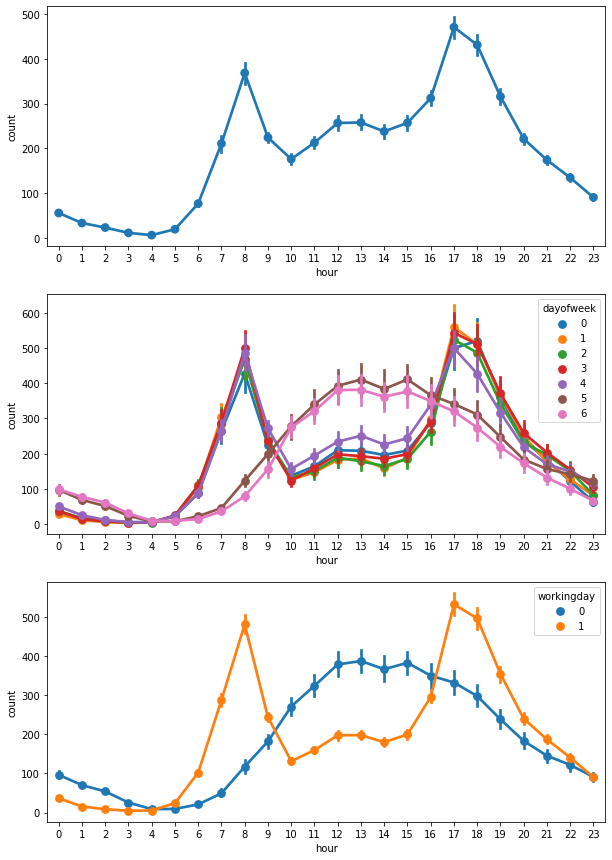

In [25]:
fig, ax= plt.subplots(3,1, figsize=(10,15))

sns.pointplot(data=train, x='hour', y='count', ax=ax[0])
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax[1])
sns.pointplot(data=train, x='hour', y='count',hue='workingday', ax=ax[2]);


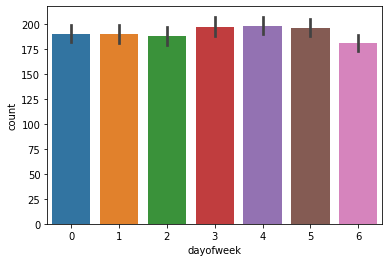

In [11]:
# 요일로 보면 어떨까? 

sns.barplot(data=train, x='dayofweek', y='count');

hour 분석을 시간, 요일, 연휴일에 대해 분석했을 때 유의미한 결과가 나옴.
1. 시간을 통해 8시, 17~18시에 빌린 횟수가 많았음.
2. 주말과 평일은 비슷한 모양
3. 세번째 표를 통해 2번이 더 확실해짐. 

왜 그럴까? 평일 출퇴근 시간에 사람들이 많이 이용함. 휴일에는 오후 시간대에 사람들이 더 많이 사용함. 

> 요일과 휴무일은 좋은 특성으로 보임. 

### 2. count(target 값)

log 변환을 통해 right_skewed를 정규분포 형식으로 변환시키기

In [6]:
import numpy as np

train['log_count'] = np.log1p(train['count'])

In [7]:
# fig, ax = plt.subplots(1,2, figsize=(18, 5))

sns.displot(train['count'], ax=ax1)
sns.displot(train['log_count'], ax=ax2);

NameError: ignored

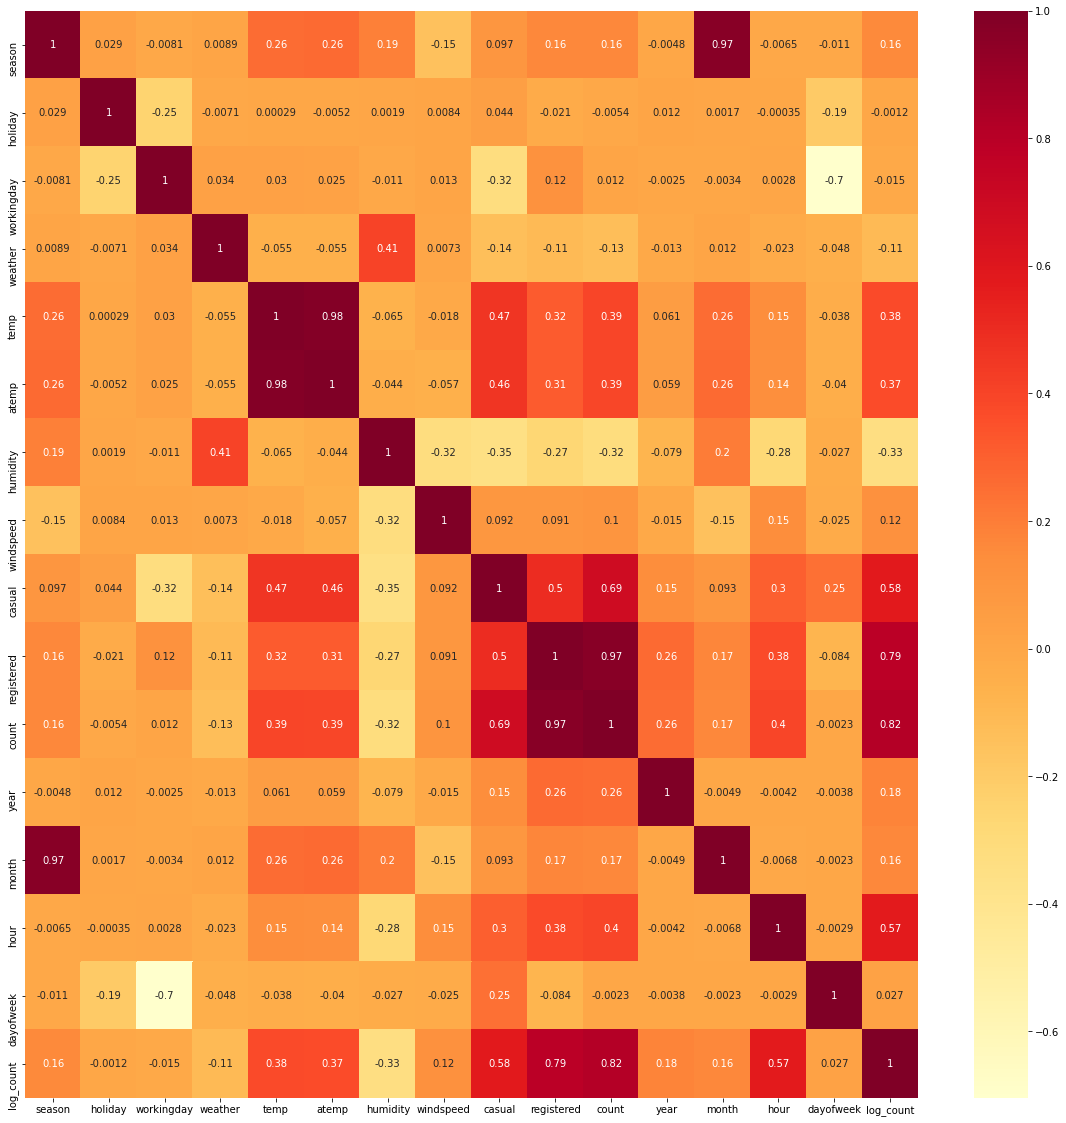

In [14]:
train_corr = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(train_corr, annot=True, cmap='YlOrRd');

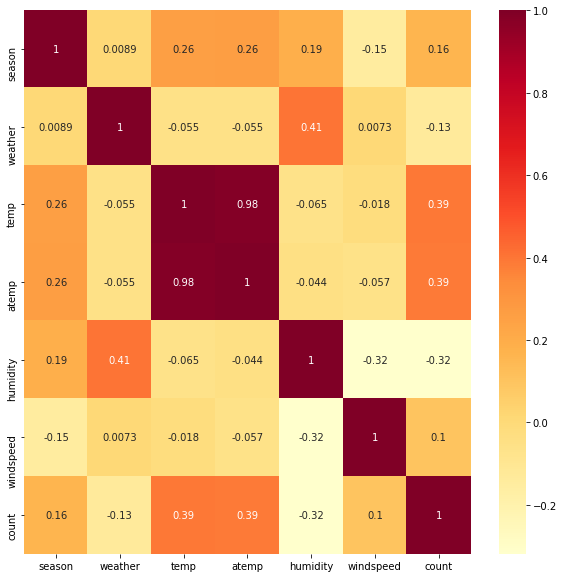

In [15]:
weather_corr = train[['season','weather', 'temp', 'atemp','humidity','windspeed','count']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(weather_corr, annot=True, cmap='YlOrRd');

In [16]:
train_corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
log_count     0.820181
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
dayofweek    -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [ ]:
# profiling을 한 번 해보자. 
!pip install pandas-profiling==2.*

In [ ]:
from pandas_profiling import ProfileReport
train.profile_report()


## 중간정리
- train columns 1차 정리(총 11개 피쳐)
    - year, dayofweek, holiday, workingday, hour season, weather, temp, atemp, humidity, windspeed
    

In [17]:
train.shape

(10886, 20)

In [8]:
# test 도 동일하게 만들어주기 

test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['dayofweek'] = test['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,4


In [9]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.2, random_state=5)


In [10]:
target = 'log_count'
features = ['year', 'dayofweek', 'holiday', 'workingday', 'hour', 'season', 'weather', 
            'temp', 'atemp', 'humidity', 'windspeed']

y_train = train[target]
X_train = train[features]

X_val = val[features]
y_val = val[target]

X_test = test[features]


In [21]:
X_train.head()

,year,dayofweek,holiday,workingday,hour,season,weather,temp,atemp,humidity,windspeed
3024,2011,3,0,1,22,3,1,26.24,31.060,57,6.0032
4605,2011,4,0,1,23,4,1,13.12,15.150,49,22.0028
8597,2012,3,0,1,14,3,1,35.26,39.395,44,6.0032
9022,2012,5,0,0,7,3,1,24.60,28.030,83,15.0013
9201,2012,3,0,1,18,3,1,29.52,34.090,70,16.9979


In [22]:
X_train.shape, X_val.shape, X_test.shape

((8708, 11), (2178, 11), (6493, 11))

In [28]:
y_train.head()

3024    5.176150
4605    4.499810
8597    5.288267
9022    4.174387
9201    6.728629
Name: log_count, dtype: float64

In [30]:
y_train.shape

(8708,)

## 4) 러신러닝 방식 적용

a. baseline model \
b. 다중선형회귀\
c. ridge 회귀\
d. 랜덤포레스트\
e. XGBoost

### a. baseline model 

In [11]:
# baseline model
# 회귀이니 평균으로 

bs_predict= [y_train.mean()] * len(X_val)


In [12]:
from sklearn.metrics import  mean_squared_error, r2_score

bs_mse = mean_squared_error(y_val, bs_predict)
bs_r2 = r2_score(y_val, bs_predict)

print('검증값','','R2:', bs_r2, ' mse:',bs_mse )

검증값  R2: -0.0003591024354110406  mse: 2.052267041334172


###b. 다중선형회귀

- b-1 그냥 기본 모델링 

In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_val)

lr_mse = mean_squared_error(y_val, y_lr_pred)
lr_r2 = r2_score(y_val, y_lr_pred)

print('mse:', lr_mse)
print('r2:', lr_r2)

mse: 1.079404739687324
r2: 0.4738538724199506


In [26]:
coef = pd.Series(lr_model.coef_, X_test.columns)
coef

year          0.428547
dayofweek     0.027297
holiday       0.075939
workingday    0.004457
hour          0.098445
season        0.179641
weather       0.009891
temp          0.010766
atemp         0.032036
humidity     -0.014651
windspeed     0.004925
dtype: float64

In [32]:
y_lr_test = lr_model.predict(X_test)

submission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')

submission['count'] = np.expm1(y_lr_test)
submission.to_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/lr_v0.csv", index=False)


- b-2 feature 선택하기 (lr1)
    - 0.01보다 작은 건 feature에서 제거
    - 제거 컬럼: workingday, weather, windspeed 

In [ ]:
X_train.columns

In [27]:
lr1_features = ['year', 'dayofweek', 'holiday', 'hour', 'season', 'temp', 'atemp', 'humidity']
X_lr1_train = X_train[lr1_features]
X_lr1_val = X_val[lr1_features]
X_lr1_test = X_test[lr1_features]

lr_model.fit(X_lr1_train, y_train)

y_lr1_pred = lr_model.predict(X_lr1_val)

lr1_mse = mean_squared_error(y_val, y_lr1_pred)
lr1_r2 = r2_score(y_val, y_lr1_pred)

print('mse:', lr1_mse)
print('r2:', lr1_r2)


mse: 1.0798914960965575
r2: 0.47361660738823763


- b-3. SelectKbest로 특성 추출해서 만들기(b-2는 내가 선택) 

In [16]:
from sklearn.feature_selection import f_regression, SelectKBest

feature 수:  1
Selected names: Index(['hour'], dtype='object')
Test MAE: $1
Test R2: 0.31902885949916626 

feature 수:  2
Selected names: Index(['hour', 'temp'], dtype='object')
Test MAE: $1
Test R2: 0.41109428285071725 

feature 수:  3
Selected names: Index(['hour', 'temp', 'atemp'], dtype='object')
Test MAE: $1
Test R2: 0.41177337293427585 

feature 수:  4
Selected names: Index(['hour', 'temp', 'atemp', 'humidity'], dtype='object')
Test MAE: $1
Test R2: 0.4376831908987556 

feature 수:  5
Selected names: Index(['year', 'hour', 'temp', 'atemp', 'humidity'], dtype='object')
Test MAE: $1
Test R2: 0.4588639418740016 

feature 수:  6
Selected names: Index(['year', 'hour', 'season', 'temp', 'atemp', 'humidity'], dtype='object')
Test MAE: $1
Test R2: 0.4726652903808085 

feature 수:  7
Selected names: Index(['year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed'], dtype='object')
Test MAE: $1
Test R2: 0.47304622629198123 

feature 수:  8
Selected names: Index(['year', 'hour', 'season', 

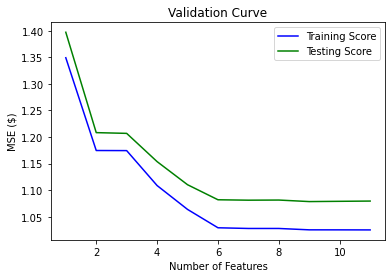

In [29]:
# 우선 몇 개 할 것인가를 알아보자.
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []

ks = range(1, len(X_train.columns)+1)

# 1부터 특성 수 만큰 사용한 모델을 만들어서 r2값을 비교해 보자. 
for k in range(1, len(X_train.columns)+1):
    print('feature 수: ', k)

    selector = SelectKBest(score_func=f_regression, k=k)

    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)

    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names:', selected_names)

    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mse = mean_squared_error(y_train, y_pred)
    training.append(mse)

    y_pred = model.predict(X_val_selected)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mse)
    print(f'Test MAE: ${mse:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MSE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()


In [17]:
# feature -7개 선택

# SelecteKBest 객체 생성
selector_7 = SelectKBest(score_func=f_regression, k=7)

#훈련용 데이터, 검증 데이터, 테스트 데이터 : transform

X_train_selector_7 = selector_7.fit_transform(X_train, y_train)
X_val_selector_7 = selector_7.transform(X_val)
X_test_selector_7 = selector_7.transform(X_test)

# 어떤 feature가 선택되었나?
all_names = X_train.columns
selected_mask = selector_7.get_support()
selected_names = all_names[selected_mask]
print('7 features selected - names: ', selected_names)

7 features selected - names:  Index(['year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed'], dtype='object')


###1-4 교차 검증

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    LinearRegression()
)

k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k,
                        scoring = 'r2' )

print('r2:', scores)

r2: [0.48625263 0.49318703 0.49981016 0.45233088 0.49853374]


In [ ]:
scores.mean() , scores.std()

###c. Ridge 회귀

- 그냥 기본 ridge (hyperparameter 조정이 없으니 다중회귀랑 값이 똑같다.)

In [32]:
from sklearn.linear_model import Ridge

rg_model = Ridge()
rg_model.fit(X_train, y_train)
y_rg_pred = rg_model.predict(X_val)

rg_mse = mean_squared_error(y_val, y_rg_pred)
rg_r2 = r2_score(y_val, y_rg_pred)

print('mse:', rg_mse)
print('r2:', rg_r2)

mse: 1.0794013287162836
r2: 0.4738555350670913


In [33]:
# 7개 선택으로 하면? /year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed'
rg_model_7 = Ridge()
rg_model_7.fit(X_train_selector_7, y_train)
y_rg_pred_7 = rg_model_7.predict(X_val_selector_7)

rg_mse_7 = mean_squared_error(y_val, y_rg_pred_7)
rg_r2_7 = r2_score(y_val, y_rg_pred_7)

print('mse:', rg_mse_7)
print('r2:', rg_r2_7)

mse: 1.0810613157730657
r2: 0.4730463893132827


- Ridge 랑 Ridge cv를 해보자.

In [ ]:
# 다항회귀에서 7개의 feature를 선정했음. 
# ->'year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed'

In [44]:
!pip install --upgrade scikit-learn==0.24.1

     |████████████████████████████████| 22.3 MB 73.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [34]:
from sklearn.linear_model import RidgeCV

# 람다 다양하게
alphas = np.arange(0, 1, 0.01)

# 모델 훈련
rgc_model = RidgeCV(alphas=alphas, cv=5)
rgc_model.fit(X_train_selector_7, y_train)

#검증 데이터로 예측값 계산
y_rgc_pred = rgc_model.predict(X_val_selector_7)

#예측값과 검증 데이터를 target값을 비교하여 모델 평가 

rgc_mse = mean_squared_error(y_val, y_rgc_pred)
rgc_r2 = r2_score(y_val, y_rgc_pred)

print('mse:', rgc_mse)
print('r2:', rgc_r2)

# 최적의 alpha값 & best_score 확인
print(f'alpha: {rgc_model.alpha_}')
print(f'cv best score: {rgc_model.best_score_}')

mse: 1.0810613190178349
r2: 0.4730463877316492
alpha: 0.99


AttributeError: ignored

In [46]:
rgc_model.coef_

array([ 0.42826555,  0.09855757,  0.18006492,  0.01164943,  0.03095018,
       -0.0146051 ,  0.00475993])

In [35]:
# 교차검증을 해보자

pipe_rg = make_pipeline(
    SimpleImputer(strategy='median'),
    RidgeCV(alphas=0.99)
)

k = 5
scores = cross_val_score(pipe_rg, X_train_selector_7, y_train, cv=k, 
                         scoring='r2')

print('r2:', scores)

r2: [nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: len() of unsized object

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: len() of unsized object

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: len() of unsized object

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

In [48]:
scores.mean(), scores.std()

(nan, nan)

In [36]:
# 다항회귀랑 ridgeCV를 같이 해보자.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# 여러 람다값은 alpha 인자값을 다양하게 시도해본다. -> 여기서는 0부터 1까지, 0.01단위로 증가하며 비교
alphas = np.arange(0, 10, 0.02)

# RidgeCV 객체 생성 및 모델 훈련
model_po_rgc = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model_po_rgc.fit(X_train_selector_7, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76,...
       8.8 , 8.82, 8.84, 8.86, 8.88, 8.9 , 8.92, 8.94, 8.96, 8.98, 9.  ,
       9.02, 9.04, 9.06, 9.08, 9.1 , 9.12, 9.14, 9.16, 9.18, 9.2 , 9.22,
       9.24, 9.26, 9.28, 9.3 , 9.32, 9.34, 9.36, 9.38, 9.4 , 9.42, 9.44,
       9.46, 9.48, 9.5 , 9.52, 9.54, 9.56, 9.58, 9.6 , 9.62, 9.64, 9.66,
       9.68, 9.7 , 9.72, 9.74, 9.76, 9.78, 9.8 , 9.82, 9.84, 9.86, 9.88,
       9.9 , 9.92, 9.94, 9.96, 9.98]),
                         cv=5, fit_intercept=True, gcv_mode=None,
      

In [57]:
# 테스트용 데이터로 예측값 계산
y_pred_po_rgc = model_po_rgc.predict(X_val_selector_7)

# 예측값과 테스트용 데이터의 target값을 비교하여 모델 평가
mse_po_rgc = mean_squared_error(y_val, y_pred_po_rgc)
r2_po_rgc = r2_score(y_val, y_pred_po_rgc)
print(f'Test MSE: ${mse_po_rgc:,.0f}')
print(f'R2 Score: {r2_po_rgc:,.6f}\n')

# 다항회귀를 통해 늘어난 피쳐 수 확인
coefs = model_po_rgc.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

# 최적의 alpha값 & best_score 확인
print(f'alpha: {model_po_rgc.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model_po_rgc.named_steps["ridgecv"].best_score_}')

Test MSE: $1
R2 Score: 0.631595

Number of Features: 120
alpha: 0.02


AttributeError: ignored

다항회귀(여기를 아직 잘 모르겠음)를 하니까 R2 값이 올라감. 하지만 뒤에 모델에 비해 R2 값이 작으므로 tree base가 더 좋은 것 같음. 

In [39]:
X_test_selector_7 = X_test[['year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed']]
y_po_rgc_test = model_po_rgc.predict(X_test_selector_7)

submission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')

submission['count'] = np.expm1(y_po_rgc_test)
submission.to_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/lr_v1.csv", index=False)

###d. Random Forest

- d.1 그냥 기본 모델링

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_jobs=-1, random_state=5)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_val)

rf_mse = mean_squared_error(y_val, y_rf_pred)
rf_r2 = r2_score(y_val, y_rf_pred)

print('mse:', rf_mse)
print('r2:', rf_r2)

mse: 0.1007407976575325
r2: 0.950894804675223


In [49]:
!pip install category_encoders==2.*

     |████████████████████████████████| 80 kB 7.3 MB/s 


In [50]:
# Ordinal encoder를 해보자. 

from category_encoders import OrdinalEncoder


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
X_train.head()

,year,dayofweek,holiday,workingday,hour,season,weather,temp,atemp,humidity,windspeed
3024,2011,3,0,1,22,3,1,26.24,31.060,57,6.0032
4605,2011,4,0,1,23,4,1,13.12,15.150,49,22.0028
8597,2012,3,0,1,14,3,1,35.26,39.395,44,6.0032
9022,2012,5,0,0,7,3,1,24.60,28.030,83,15.0013
9201,2012,3,0,1,18,3,1,29.52,34.090,70,16.9979


In [53]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, random_state=5)
)

pipe_rf.fit(X_train, y_train)

y_prf_pred = pipe_rf.predict(X_val)

prf_mse = mean_squared_error(y_val, y_prf_pred)
prf_r2 = r2_score(y_val, y_prf_pred)

print('mse:', prf_mse)
print('r2:', prf_r2)

mse: 0.1007407976575325
r2: 0.950894804675223


- d-2 RandomizedSearch CV





In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
from random import randint


In [ ]:
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': range(50, 300, 50), 
    'randomforestregressor__max_depth': range(1,20,2), 
    'randomforestregressor__max_features': range(1,11,1) 
}

rf_reg_rcv = RandomizedSearchCV(
    pipe_rf,
    param_distributions=dists,
    n_iter=10,
    cv=5,
    scoring='r2',
    verbose=1,
)

rf_reg_rcv.fit(X_train, y_train)

In [58]:
# RandomCV 결과 확인
print('Best Parameters: ', rf_reg_rcv.best_params_)
print('R2: ', rf_reg_rcv.best_score_)


Best Parameters:  {'simpleimputer__strategy': 'median', 'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_features': 6, 'randomforestregressor__max_depth': 15}
R2:  0.9458779981693051


In [59]:
best_rf_pipe = rf_reg_rcv.best_estimator_

y_best_rf_pred = best_rf_pipe.predict(X_val)
r2_best_rf=r2_score(y_val, y_best_rf_pred)

print('R2:', r2_best_rf)

R2: 0.9482634711290066


- d-3 위에서 구한 하이퍼파라미터 최적값을 적용해서 데이터셋에 최적화된 모델로 재학습하자. 

In [60]:
# train, val 데이터 합치기

X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])
X_train.shape, y_train.shape

((10886, 11), (10886,))

In [61]:
X_train.head()

,year,dayofweek,holiday,workingday,hour,season,weather,temp,atemp,humidity,windspeed
3024,2011,3,0,1,22,3,1,26.24,31.060,57,6.0032
4605,2011,4,0,1,23,4,1,13.12,15.150,49,22.0028
8597,2012,3,0,1,14,3,1,35.26,39.395,44,6.0032
9022,2012,5,0,0,7,3,1,24.60,28.030,83,15.0013
9201,2012,3,0,1,18,3,1,29.52,34.090,70,16.9979


In [51]:
pipe_rf_fin = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth = 13, max_features=8, random_state=5)
)


In [52]:
pipe_rf_fin.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=13,
                                       max_features=8, max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=

In [53]:
y_pred_rf_fin = pipe_rf_fin.predict(X_test)
submission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')
submission['count'] = np.expm1(y_pred_rf_fin)

submission.to_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/randomforest_v1.csv", index=False)

- kaggle에 제출해 보자.

In [54]:
y_rf_test = rf_model.predict(X_test)

In [55]:
submission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')

submission['count'] = np.expm1(y_rf_test)

In [ ]:
submission.head()

In [56]:
submission.to_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/randomforest_v2.csv", index=False)

###e. XGBoost


In [60]:
# 다시 데이터 나눠주기

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =5)

In [61]:
X_train.shape

(8708, 11)

- e-1. 그냥 기본모델

In [57]:
pip install xgboost

In [62]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)
y_xg_pred = xg_model.predict(X_val)

xg_mse = mean_squared_error(y_val, y_rf_pred)
xg_r2 = r2_score(y_val, y_xg_pred)

print('mse:', xg_mse)
print('r2:', xg_r2)

[07:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse: 3.9272774285765393
r2: 0.9258199452303806


- e-2. parameter 조정하기 

In [65]:
pipe_xgb= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(n_estimators=100,
                 random_state=5,
                 n_jobs=-1,
                 max_depth=13,
                 learning_rate=0.2)
)

pipe_xgb.fit(X_train, y_train)

[07:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster=...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.2,
                              max_delta_step=0, max_depth=13,
                              min_child_weight=1, missing=None,
                              n_estimators=100, n_jobs=-1, nthread=None,
        

In [66]:
y_xgb_pred = pipe_xgb.predict(X_val)

xgb_mse = mean_squared_error(y_val, y_xgb_pred)
xgb_r2 = r2_score(y_val, y_xgb_pred)

print('mse:', xgb_mse)
print('r2:', xgb_r2)

mse: 0.08940505722219735
r2: 0.9565123355993077


- kaggle에 제출해보자. 

In [67]:
y_xgb_test = pipe_xgb.predict(X_test)

submission = pd.read_csv('/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/sampleSubmission.csv')

submission['count'] = np.expm1(y_xgb_test)
submission.to_csv("/content/drive/MyDrive/AI_05/복습/Section2/Bike Sharing Demand/xgboost_v1.csv", index=False)


##5. 머신러닝 모델 해석 (SHAP)

- 모델: random forest (rf.model) 사용
- featuers : 11개 중 7개  (year,hour,
season,temp,atemp,humidity,
windspeed)

In [14]:
y_train

3024    5.176150
4605    4.499810
8597    5.288267
9022    4.174387
9201    6.728629
          ...   
3046    5.840642
9917    5.602119
4079    3.871201
2254    5.549076
2915    5.135798
Name: log_count, Length: 8708, dtype: float64

In [65]:
sh_features = ['year','hour', 'season','temp','atemp','humidity', 'windspeed']
sh_target = 'log_count'

X_train_sh = X_train[sh_features]
X_val_sh = X_val[sh_features]

In [14]:
row = X_val.iloc[[2]]
row

,year,dayofweek,holiday,workingday,hour,season,weather,temp,atemp,humidity,windspeed
4623,2011,5,0,0,17,4,1,15.58,19.695,40,11.0014


In [15]:
print(y_val.iloc[[2]])
print(np.expm1(y_val.iloc[[2]]))

4623    5.814131
Name: log_count, dtype: float64
4623    334.0
Name: log_count, dtype: float64


In [16]:
rf_model.predict(row)

array([5.46010759])

In [18]:
pip install shap

     |████████████████████████████████| 356 kB 2.7 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=c53a138a1ab310ce0e4a3a1b844ee39e683e05f58dfff2ba112fbe24232a626a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [17]:
# 모델이 왜 이렇게 예측 했나?

import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)


In [21]:
# 100개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의하세요.
shap.initjs()
shap_values = explainer.shap_values(X_val.iloc[:300])
shap.force_plot(explainer.expected_value, shap_values, X_val.iloc[:300])

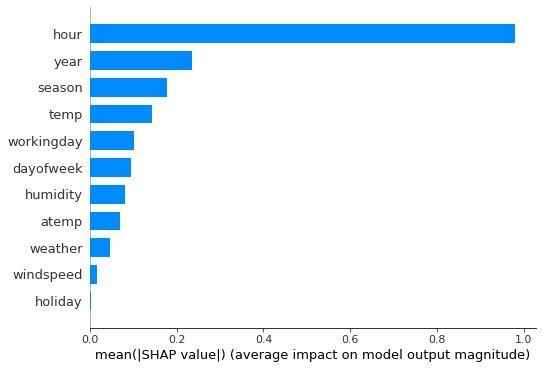

In [19]:
# summary plot
shap_values = explainer.shap_values(X_val.iloc[:300])
shap.summary_plot(shap_values, X_val.iloc[:300], plot_type='bar')